In [1]:
from jqdatasdk import *
auth("13586937048", "HamalHCHbest555")

auth success 


In [172]:
import single_factor_analysis as sfa
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
import warnings
from tqdm import tqdm
import matplotlib.pyplot as plt
from single_factor_analysis import *
import statsmodels.api as sm
from scipy.stats import spearmanr
from HCH_singlefactor_analysis import SingleFactorTool
%matplotlib inline

In [3]:
count=get_query_count()
print(count)

{'total': 1000000, 'spare': 931829}


In [5]:
df = get_all_securities(['etf'])
df = df.reset_index().rename(columns={'index':'code'})
df = df[df['start_date'] < '2023-01-01']
df

,code,display_name,name,start_date,end_date,type
0,159001.XSHE,货币ETF,BZJ,2014-10-20,2200-01-01,etf
1,159003.XSHE,招商快线ETF,ZSKX,2014-10-20,2200-01-01,etf
2,159005.XSHE,汇添富快钱ETF,TFKQ,2015-01-13,2200-01-01,etf
286,159601.XSHE,A50ETF,A50ETF,2021-11-08,2200-01-01,etf
287,159602.XSHE,中国A50ETF,ZGA50ETF,2021-11-08,2200-01-01,etf
...,...,...,...,...,...,...
1388,588360.XSHG,创创ETF,CCETF,2021-07-06,2200-01-01,etf
1389,588370.XSHG,科创策略,KCCL,2022-12-13,2200-01-01,etf
1390,588380.XSHG,创50ETF,C50ETF,2021-07-06,2200-01-01,etf
1391,588390.XSHG,科创创业,KCCY,2021-08-30,2200-01-01,etf


In [6]:
codes = []
for code in df.code:
    price = get_price(code, end_date='2025-09-13', count=300).dropna()
    price['pchg'] = price['close'].pct_change()
    if price['money'].mean() > 5e7: # 日均低于5000w成交额
        codes.append([code, price['money'].mean()/1e8, price['pchg'].mean(), price['pchg'].std()])
    else:
        print(f"排除{code} {df[df['code']==code]['display_name'].iloc[0]}, 成交额均值 {round(price['money'].mean()/1e7, 2)}kw")
codes = pd.DataFrame(codes, columns=['code', 'money','pchg_mean','pchg_std'])
df = df.merge(codes, how='inner', on='code')
df.to_excel('多因子研究环境-ETF.xlsx', index=False)

排除159003.XSHE 招商快线ETF, 成交额均值 2.43kw
排除159005.XSHE 汇添富快钱ETF, 成交额均值 1.2kw
排除159602.XSHE 中国A50ETF, 成交额均值 1.54kw
排除159603.XSHE 双创龙头ETF, 成交额均值 1.47kw
排除159606.XSHE 中证500成长ETF, 成交额均值 0.97kw
排除159608.XSHE 稀有金属ETF, 成交额均值 2.07kw
排除159609.XSHE 光伏龙头ETF, 成交额均值 1.82kw
排除159610.XSHE 500ETF增强, 成交额均值 1.86kw
排除159613.XSHE 信息安全ETF, 成交额均值 0.54kw
排除159616.XSHE 农牧ETF, 成交额均值 0.48kw
排除159617.XSHE 500价值ETF, 成交额均值 0.17kw
排除159618.XSHE 光伏ETF指数基金, 成交额均值 0.43kw
排除159619.XSHE 基建ETF, 成交额均值 1.77kw
排除159620.XSHE 500成长ETF, 成交额均值 0.19kw
排除159621.XSHE MSCIESGETF, 成交额均值 0.26kw
排除159623.XSHE 成渝经济圈ETF, 成交额均值 0.6kw
排除159625.XSHE 绿色电力ETF, 成交额均值 1.6kw
排除159627.XSHE A100ETF, 成交额均值 0.36kw
排除159630.XSHE A100ETF基金, 成交额均值 0.29kw
排除159631.XSHE 中证A100ETF, 成交额均值 0.8kw
排除159635.XSHE 基建50ETF, 成交额均值 1.57kw
排除159637.XSHE 新能源车龙头ETF, 成交额均值 1.26kw
排除159639.XSHE 碳中和ETF南方, 成交额均值 1.02kw
排除159640.XSHE 碳中和龙头ETF, 成交额均值 0.43kw
排除159641.XSHE 双碳ETF, 成交额均值 1.27kw
排除159642.XSHE 碳中和100ETF, 成交额均值 0.07kw
排除159643.XSHE 疫苗ETF, 成交额均值 0.95kw
排除159645.XSHE 疫苗

In [ ]:
security_list = df.code.to_list()
df2=get_extras('acc_net_value',security_list,start_date='2024-09-07', end_date='2025-09-13', df=True)


In [15]:
df2.to_excel('多因子研究环境-ETF-净值.xlsx', index=False)

单因子测试
============================
导入相关包

In [3]:
# 获取行情与因子数据
stocks = list(get_all_securities(['stock']).index)
security_list = stocks[:100]

In [57]:
d = get_industry(security=security_list,date="2025-09-01",df=True)
industry_data = d[d.type == 'zjw']
industry_data

,code,type,industry_code,industry_name
1,000056.XSHE,zjw,L72,商务服务业
2,000058.XSHE,zjw,L72,商务服务业
3,000061.XSHE,zjw,L72,商务服务业
5,000415.XSHE,zjw,L71,租赁业
14,000089.XSHE,zjw,G56,航空运输业
...,...,...,...,...
431,000156.XSHE,zjw,I63,电信、广播电视和卫星传输服务
463,000009.XSHE,zjw,J69,其他金融业
466,000166.XSHE,zjw,J67,资本市场服务
467,000001.XSHE,zjw,J66,货币金融服务


In [4]:
sample_data = get_factor_values(securities=security_list, factors=['sharpe_ratio_120'], 
                             end_date='2025-09-1',count=200)
price_data = get_price(security=security_list, end_date='2025-09-1', frequency='daily', fields=['close'], skip_paused=False, fq='pre', count=200 , round=True)
#将sample_data转换成dataframe
factor_data = sample_data['sharpe_ratio_120'].copy()
factor_data.index = pd.to_datetime(factor_data.index)
factor_data = factor_data.sort_index()



In [31]:
price_data

,date,order_book_id,close
0,2024-11-08,000001.XSHE,11.13
200,2024-11-08,000002.XSHE,9.51
400,2024-11-08,000004.XSHE,19.32
600,2024-11-08,000005.XSHE,NaN
800,2024-11-08,000006.XSHE,8.97
...,...,...,...
19199,2025-09-01,000422.XSHE,14.28
19399,2025-09-01,000423.XSHE,50.55
19599,2025-09-01,000425.XSHE,9.89
19799,2025-09-01,000426.XSHE,23.09


In [59]:
industry_data.rename(columns={'code':'order_book_id'}, inplace=True)
industry_data

,order_book_id,type,industry_code,industry_name
1,000056.XSHE,zjw,L72,商务服务业
2,000058.XSHE,zjw,L72,商务服务业
3,000061.XSHE,zjw,L72,商务服务业
5,000415.XSHE,zjw,L71,租赁业
14,000089.XSHE,zjw,G56,航空运输业
...,...,...,...,...
431,000156.XSHE,zjw,I63,电信、广播电视和卫星传输服务
463,000009.XSHE,zjw,J69,其他金融业
466,000166.XSHE,zjw,J67,资本市场服务
467,000001.XSHE,zjw,J66,货币金融服务


In [62]:
price_industry = price_data.merge(industry_data[['order_book_id', 'industry_name']], on='order_book_id', how='left')
price_industry

,date,order_book_id,close,industry_name
0,2024-11-08,000001.XSHE,11.13,货币金融服务
1,2024-11-08,000002.XSHE,9.51,房地产业
2,2024-11-08,000004.XSHE,19.32,软件和信息技术服务业
3,2024-11-08,000005.XSHE,NaN,NaN
4,2024-11-08,000006.XSHE,8.97,房地产业
...,...,...,...,...
19995,2025-09-01,000422.XSHE,14.28,化学原料和化学制品制造业
19996,2025-09-01,000423.XSHE,50.55,医药制造业
19997,2025-09-01,000425.XSHE,9.89,专用设备制造业
19998,2025-09-01,000426.XSHE,23.09,有色金属矿采选业


In [5]:
# 数据预处理
price_data.columns=['date','order_book_id','close']
price_data.sort_values(by=['date','order_book_id'], inplace=True)
factor_data.reset_index(inplace=True)
factor_data.rename(columns={'index':'date'}, inplace=True)

In [6]:
price_data

,date,order_book_id,close
0,2024-11-08,000001.XSHE,11.13
200,2024-11-08,000002.XSHE,9.51
400,2024-11-08,000004.XSHE,19.32
600,2024-11-08,000005.XSHE,NaN
800,2024-11-08,000006.XSHE,8.97
...,...,...,...
19199,2025-09-01,000422.XSHE,14.28
19399,2025-09-01,000423.XSHE,50.55
19599,2025-09-01,000425.XSHE,9.89
19799,2025-09-01,000426.XSHE,23.09


In [7]:
factor_data

,date,000001.XSHE,000002.XSHE,000004.XSHE,000005.XSHE,000006.XSHE,000007.XSHE,000008.XSHE,000009.XSHE,000010.XSHE,...,000417.XSHE,000418.XSHE,000419.XSHE,000420.XSHE,000421.XSHE,000422.XSHE,000423.XSHE,000425.XSHE,000426.XSHE,000428.XSHE
0,2024-11-08,1.278418,1.161028,2.381302,NaN,6.818917,4.609627,1.039559,-0.029679,2.749074,...,0.729763,NaN,1.134021,0.653715,0.230463,0.899119,-0.689866,0.296961,0.059686,0.889249
1,2024-11-11,1.247321,0.808943,2.630496,NaN,7.602487,4.637971,1.311228,0.162456,2.440215,...,0.807825,NaN,1.107206,0.249071,0.515166,0.676830,-0.802466,0.409253,0.097767,0.776497
2,2024-11-12,0.901431,0.446183,2.613307,NaN,8.107203,4.683804,1.079985,0.092788,2.039848,...,0.902596,NaN,0.904156,0.080446,0.466301,0.803728,-0.650023,0.183379,-0.166989,0.762034
3,2024-11-13,0.753721,-0.046906,2.511209,NaN,6.166505,4.086611,0.876661,-0.061413,1.806894,...,0.789202,NaN,0.919139,-0.455539,0.336050,0.388178,-0.675506,0.241816,-0.268233,0.376311
4,2024-11-14,0.729835,-0.180987,1.872375,NaN,5.073939,3.639295,0.665813,-0.189372,1.803572,...,0.673248,NaN,0.676752,-0.677131,0.328407,0.385884,-0.662202,0.288312,-0.689401,0.123426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2025-08-26,1.082183,-0.801267,-0.580244,NaN,0.503046,1.063082,0.262029,0.638929,3.514999,...,0.680851,NaN,0.545730,0.538437,0.813370,0.795479,-0.860168,0.325839,4.428330,1.145039
196,2025-08-27,0.562898,-0.928613,-0.378321,NaN,0.301202,0.917862,0.012883,0.636541,3.183755,...,0.530930,NaN,0.415937,0.546499,0.549668,0.671090,-0.809511,-0.004327,3.347046,1.021121
197,2025-08-28,0.617947,-1.109439,-0.348316,NaN,0.328089,0.904624,0.012459,0.591722,3.102343,...,0.563601,NaN,0.387158,0.510027,0.448783,0.695650,-0.807391,0.271214,3.418312,1.083152
198,2025-08-29,0.541326,-0.908740,-0.387612,NaN,0.621380,0.996337,0.075907,1.075816,2.632324,...,0.645840,NaN,0.443890,0.564566,0.411180,0.688310,-0.734301,0.055113,3.616990,1.185621


In [48]:
# 因子数据整理为长格式
factor_date_reset = None
factor_date_reset = factor_data.melt(id_vars=['date'], var_name='order_book_id', value_name='sharpe_ratio_120')
factor_date_reset.sort_values(by=['date','order_book_id'], inplace=True)
factor_date_reset.rename(columns={'sharpe_ratio_120':'factor_value'}, inplace=True)
factor_date_reset


,date,order_book_id,factor_value
0,2024-11-08,000001.XSHE,1.278418
200,2024-11-08,000002.XSHE,1.161028
400,2024-11-08,000004.XSHE,2.381302
600,2024-11-08,000005.XSHE,NaN
800,2024-11-08,000006.XSHE,6.818917
...,...,...,...
19199,2025-09-01,000422.XSHE,0.859262
19399,2025-09-01,000423.XSHE,-0.763356
19599,2025-09-01,000425.XSHE,0.269480
19799,2025-09-01,000426.XSHE,5.167494


因子IC值计算
===================

In [9]:
def calculate_factor_ic(factor_df, price_df, forward_days=5, buy_filter=True, sell_filter=False):
    merged_df = pd.merge(factor_df, price_df, on=['date', 'order_book_id'], how='inner')
    merged_df['future_return'] = merged_df.groupby('order_book_id')['close'].shift(-forward_days) / merged_df['close'] - 1
    ic_values = []


In [63]:
merged_df = pd.merge(factor_date_reset, price_industry, on=['date', 'order_book_id'], how='inner')
merged_df['future_return'] = merged_df.groupby('order_book_id')['close'].shift(-1) / merged_df['close'] - 1
merged_df.dropna(inplace=True)
merged_df

,date,order_book_id,factor_value,close,industry_name,future_return
0,2024-11-08,000001.XSHE,1.278418,11.13,货币金融服务,-0.010782
1,2024-11-08,000002.XSHE,1.161028,9.51,房地产业,-0.022082
2,2024-11-08,000004.XSHE,2.381302,19.32,软件和信息技术服务业,0.055901
4,2024-11-08,000006.XSHE,6.818917,8.97,房地产业,0.056856
5,2024-11-08,000007.XSHE,4.609627,7.46,房地产业,0.021448
...,...,...,...,...,...,...
19895,2025-08-29,000422.XSHE,0.688310,13.99,化学原料和化学制品制造业,0.020729
19896,2025-08-29,000423.XSHE,-0.734301,50.60,医药制造业,-0.000988
19897,2025-08-29,000425.XSHE,0.055113,9.56,专用设备制造业,0.034519
19898,2025-08-29,000426.XSHE,3.616990,21.33,有色金属矿采选业,0.082513


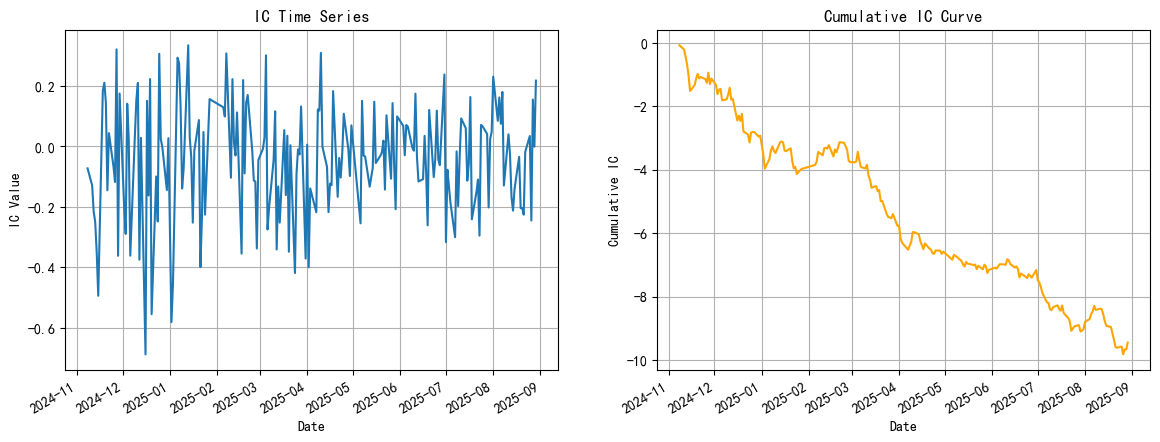

In [53]:
from scipy import stats
def calculate_ic_cross_sectional(df):
    """
    计算横截面IC值（每个时间截面上因子值与未来收益率的相关系数）
    """
    ic_series = []
    for date, group in df.groupby('date'):
        # 删除未来收益率为NaN的行
        valid_data = group.dropna(subset=['future_return'])
        
        if len(valid_data) > 1:  # 至少需要2个数据点
            # 使用斯皮尔曼秩相关系数（更稳健）
            corr, _ = spearmanr(valid_data['factor_value'], valid_data['future_return'])
            ic_series.append({'date': date, 'ic': corr})
    
    ic_df = pd.DataFrame(ic_series)
    if len(ic_df) == 0:
        return {
            'IC_mean': np.nan,
            'IC_std': np.nan,
            'ICIR': np.nan,
            'IC_positive_ratio': np.nan,
            'IC_skew': np.nan,
            'IC_kurtosis': np.nan,
            'IC_tvalue': np.nan,
            'IC_pvalue': np.nan,
            'IC_series': ic_df
        }
    ic_vals = ic_df['ic'].astype(float).dropna()
    ic_mean = ic_vals.mean()
    ic_std = ic_vals.std(ddof=1)
    icir = ic_mean / ic_std if ic_std != 0 else np.nan
    ic_positive_ratio = (ic_vals > 0).mean()
    ic_skew = stats.skew(ic_vals, nan_policy='omit')
    ic_kurtosis = stats.kurtosis(ic_vals, fisher=True, nan_policy='omit')
    t_stat, p_value = stats.ttest_1samp(ic_vals, 0, nan_policy='omit')
    # IC时间序列图和累积IC值曲线
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    ic_df.plot(x='date', y='ic', kind='line', ax=ax1, title='IC Time Series', legend=False)
    ax1.set_xlabel('Date')
    ax1.set_ylabel('IC Value')
    ax1.grid(True)
    #累积IC值曲线
    ic_df_cum = ic_df.set_index('date')['ic'].cumsum()
    ic_df_cum.plot(ax=ax2, title='Cumulative IC Curve', color='orange', legend=False)
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Cumulative IC')
    ax2.grid(True)
    return ic_df,{
        'IC_mean': ic_mean,
        'IC_std': ic_std,
        'ICIR': icir,
        'IC_positive_ratio': ic_positive_ratio,
        'IC_skew': ic_skew,
        'IC_kurtosis': ic_kurtosis,
        'IC_tvalue': t_stat,
        'IC_pvalue': p_value,
        'IC_series': ic_series
    }

result_ic = calculate_ic_cross_sectional(merged_df)

In [12]:
def create_quantile_groups(df, factor_col='factor_value', n_groups=5):
    """
    在每个交易日内，根据因子值将股票分为n组
    """
    # 使用pd.qcut按分位数分组
    # labels=False 返回组索引（0到n_groups-1）
    df['group'] = df.groupby('date')[factor_col].transform(
        lambda x: pd.qcut(x, q=n_groups, labels=False, duplicates='drop')
    )
    return df


In [13]:
# 应用分组
data_with_groups = create_quantile_groups(merged_df,factor_col='factor_value', n_groups=5)
data_with_groups[data_with_groups['group']==4]

,date,order_book_id,factor_value,close,future_return,group
2,2024-11-08,000004.XSHE,2.381302,19.32,0.055901,4
4,2024-11-08,000006.XSHE,6.818917,8.97,0.056856,4
5,2024-11-08,000007.XSHE,4.609627,7.46,0.021448,4
8,2024-11-08,000010.XSHE,2.749074,3.22,-0.024845,4
12,2024-11-08,000016.XSHE,4.751699,6.41,-0.053042,4
...,...,...,...,...,...,...
19882,2025-08-29,000407.XSHE,1.084396,3.63,0.019284,4
19883,2025-08-29,000408.XSHE,5.448650,52.90,0.016446,4
19886,2025-08-29,000411.XSHE,1.091834,11.64,0.056701,4
19898,2025-08-29,000426.XSHE,3.616990,21.33,0.082513,4


In [14]:
data_with_groups['return'] = data_with_groups['close'].shift(-1) / data_with_groups['close'] - 1
data_with_groups

,date,order_book_id,factor_value,close,future_return,group,return
0,2024-11-08,000001.XSHE,1.278418,11.13,-0.010782,3,-0.145553
1,2024-11-08,000002.XSHE,1.161028,9.51,-0.022082,3,1.031546
2,2024-11-08,000004.XSHE,2.381302,19.32,0.055901,4,-0.535714
4,2024-11-08,000006.XSHE,6.818917,8.97,0.056856,4,-0.168339
5,2024-11-08,000007.XSHE,4.609627,7.46,0.021448,4,-0.624665
...,...,...,...,...,...,...,...
19895,2025-08-29,000422.XSHE,0.688310,13.99,0.020729,3,2.616869
19896,2025-08-29,000423.XSHE,-0.734301,50.60,-0.000988,0,-0.811067
19897,2025-08-29,000425.XSHE,0.055113,9.56,0.034519,1,1.231172
19898,2025-08-29,000426.XSHE,3.616990,21.33,0.082513,4,-0.828411


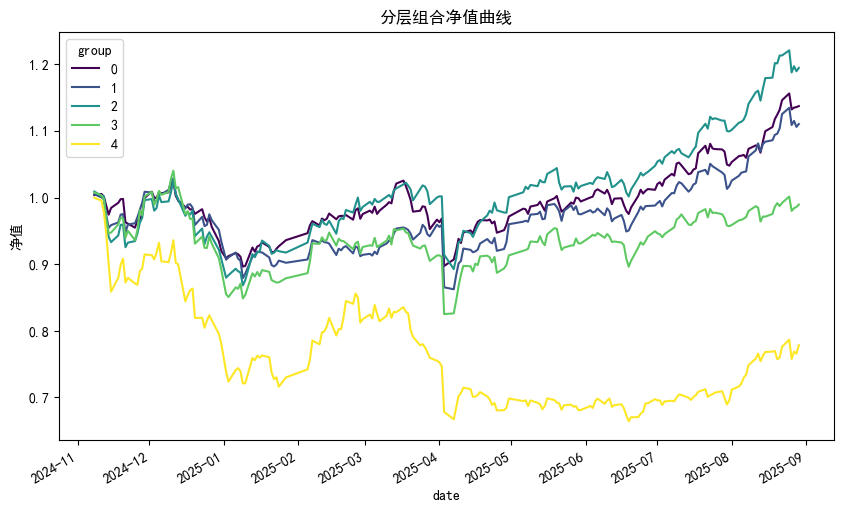

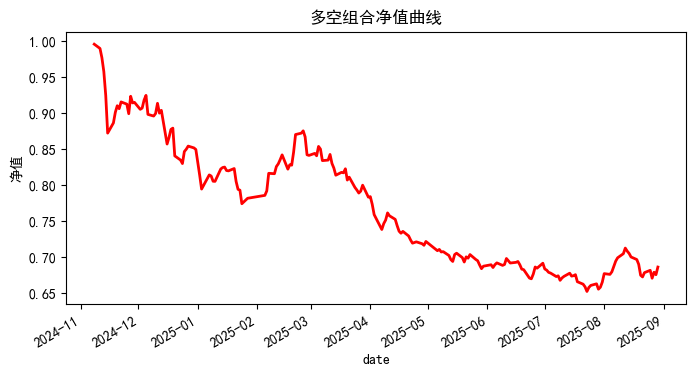

各组末期净值（单调性）： [1.13726799 1.11034247 1.19458447 0.98938373 0.77842556]
多空组合末期净值： 0.6866524179298593


In [ ]:

def layered_effect_analysis(df, factor_col='factor_value', return_col='future_return', n_groups=5):
    """
    分层效应分析：按因子分组、计算分组净值和多空净值，并检测单调性
    df: 包含 'date', 'order_book_id', factor_col, return_col 的长表
    """
    # Step1: 分组
    df = df.copy()
    df['group'] = df.groupby('date')[factor_col].transform(
        lambda x: pd.qcut(x, q=n_groups, labels=False, duplicates='drop')
    )
    # Step2: 计算每日各组等权收益
    group_daily_return = df.groupby(['date', 'group'])[return_col].mean().unstack()
    # Step3: 计算分组净值（累积收益）
    group_nav = (1 + group_daily_return).cumprod()
    # Step4: 多空组合净值（top组减bottom组）
    long_short_return = group_daily_return[n_groups-1] - group_daily_return[0]
    long_short_nav = (1 + long_short_return).cumprod()
    # Step5: 单调性检测（每组年化收益率/末期净值递减/递增）
    final_nav = group_nav.iloc[-1]
    monotonicity = final_nav.sort_index().values
    # Step6: 可视化
    plt.figure(figsize=(10,6))
    group_nav.plot(ax=plt.gca(), cmap='viridis', lw=1.5, legend=True, title='分层组合净值曲线')
    plt.ylabel('净值')
    plt.show()
    plt.figure(figsize=(8,4))
    long_short_nav.plot(ax=plt.gca(), color='red', lw=2, title='多空组合净值曲线')
    plt.ylabel('净值')
    plt.show()
    print('各组末期净值（单调性）：', monotonicity)
    print('多空组合末期净值：', long_short_nav.iloc[-1])
    return {
        'group_nav': group_nav,
        'long_short_nav': long_short_nav,
        'monotonicity': monotonicity
    }

result = layered_effect_analysis(merged_df, factor_col='factor_value', return_col='future_return', n_groups=5)

因子行业分析
=============


In [136]:
industry_data_price = merged_df.copy()
industry_data_price

,date,order_book_id,factor_value,close,industry_name,future_return
0,2024-11-08,000001.XSHE,1.278418,11.13,货币金融服务,-0.010782
1,2024-11-08,000002.XSHE,1.161028,9.51,房地产业,-0.022082
2,2024-11-08,000004.XSHE,2.381302,19.32,软件和信息技术服务业,0.055901
4,2024-11-08,000006.XSHE,6.818917,8.97,房地产业,0.056856
5,2024-11-08,000007.XSHE,4.609627,7.46,房地产业,0.021448
...,...,...,...,...,...,...
19895,2025-08-29,000422.XSHE,0.688310,13.99,化学原料和化学制品制造业,0.020729
19896,2025-08-29,000423.XSHE,-0.734301,50.60,医药制造业,-0.000988
19897,2025-08-29,000425.XSHE,0.055113,9.56,专用设备制造业,0.034519
19898,2025-08-29,000426.XSHE,3.616990,21.33,有色金属矿采选业,0.082513


In [148]:
industry_stats = pd.DataFrame(industry_data_price.groupby('industry_name')['factor_value'].agg([
    'count', 'mean', 'std', 'min', 'median', 'max'
]).round(4))

print("各行业因子值统计:")
industry_stats

各行业因子值统计:


,count,mean,std,min,median,max
industry_name,,,,,,
专用设备制造业,398,0.5778,0.9221,-0.8295,0.4116,4.2653
住宿业,199,0.3179,0.6158,-0.8738,0.2974,2.5049
其他金融业,199,-0.1853,0.7507,-1.9702,0.0968,1.0758
化学原料和化学制品制造业,597,0.9241,1.5101,-1.1570,0.4645,5.4486
化学纤维制造业,199,0.5785,0.6319,-0.6848,0.5498,2.2700
医药制造业,597,0.0579,0.9136,-1.6099,-0.0042,2.1960
商务服务业,597,1.1203,1.5162,-1.2292,0.8098,6.7204
土木工程建筑业,398,0.8741,1.8279,-1.8501,0.4180,8.1214
建筑安装业,199,1.4509,2.0639,-0.8963,0.7510,11.3956


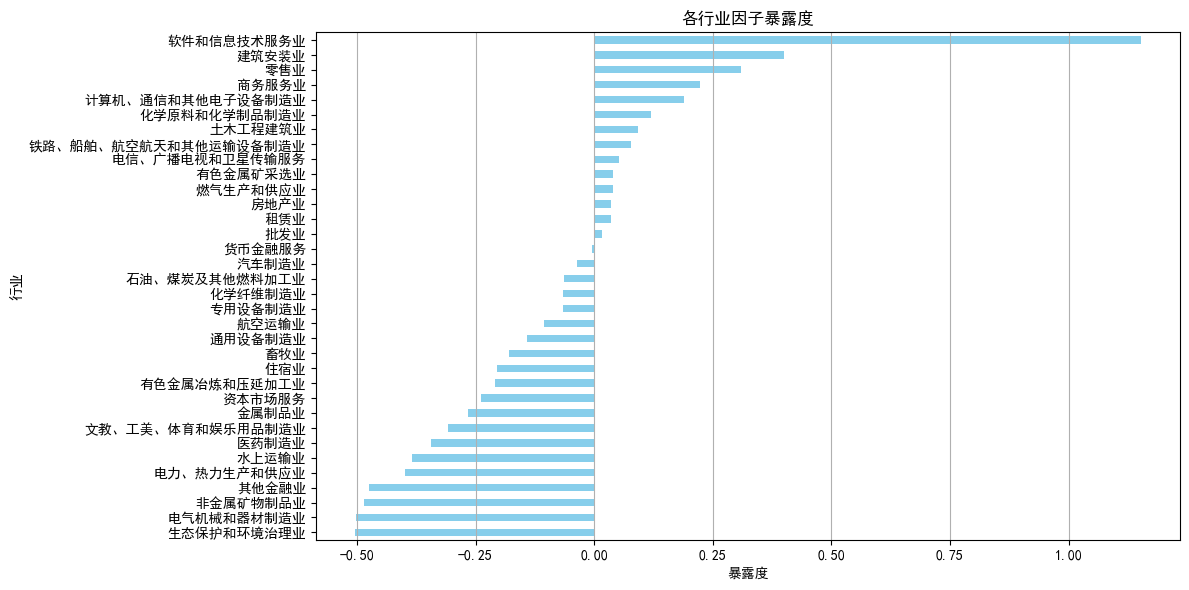

In [145]:
import matplotlib.pyplot as plt

# 1. 计算全市场均值和标准差
f = industry_data_price.copy()
market_mean = f['factor_value'].mean()
market_std = f['factor_value'].std(ddof=1)

# 2. 计算各行业均值
industry_mean = f.groupby('industry_name')['factor_value'].mean()

# 3. 计算行业暴露度 (f-m)/u
industry_exposure = (industry_mean - market_mean) / market_std

# 4. 可视化
plt.figure(figsize=(12,6))
industry_exposure.sort_values().plot(kind='barh', color='skyblue')
plt.title('各行业因子暴露度')
plt.xlabel('暴露度')
plt.ylabel('行业')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [104]:
ic_by_industry[ic_by_industry['date'] == '2025-08-29']

,date,industry_name,IC
6732,2025-08-29,专用设备制造业,1.000000
6735,2025-08-29,化学原料和化学制品制造业,0.373879
6737,2025-08-29,医药制造业,0.734414
6738,2025-08-29,商务服务业,-0.891483
6739,2025-08-29,土木工程建筑业,1.000000
6741,2025-08-29,房地产业,-0.132893
6742,2025-08-29,批发业,0.285348
6747,2025-08-29,汽车制造业,1.000000
6748,2025-08-29,燃气生产和供应业,1.000000
6751,2025-08-29,电力、热力生产和供应业,0.122534


IC正率: 0.3969849246231156
股票层面方向胜率（平均每日）: 0.4591782441619864
多空胜率 (Top > Bottom) : 0.4623115577889447


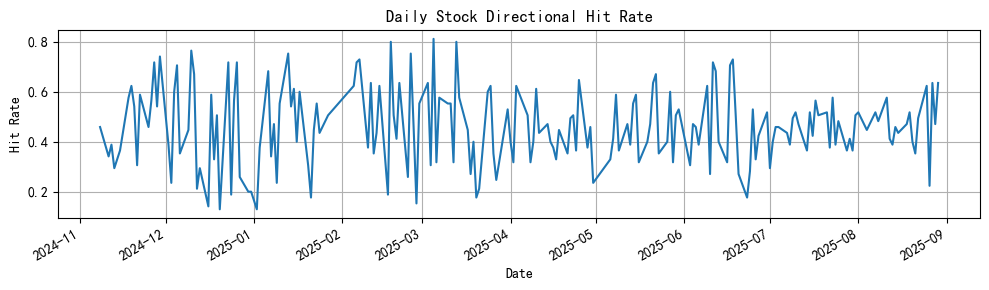

In [ ]:

#  merged_df 包含列 ['date','order_book_id','factor_value','future_return']
df = merged_df.copy()

# 1) IC正率（若已有 ic_df，可用已有结果）
# 如果 calculate_ic_cross_sectional 返回 ic_df，可复用；这里演示从头计算IC正率
from scipy.stats import spearmanr
ic_list = []
for date, g in df.groupby('date'):
    g = g.dropna(subset=['factor_value','future_return'])
    if len(g) > 1:
        ic, _ = spearmanr(g['factor_value'], g['future_return'])
        ic_list.append({'date': date, 'ic': ic})
ic_df = pd.DataFrame(ic_list)
ic_positive_ratio = (ic_df['ic'] > 0).mean()
print('IC正率:', ic_positive_ratio)

# 2) 股票层面方向胜率（按日统计，严格要求乘积>0，即同号才算胜）
df2 = df.dropna(subset=['factor_value','future_return']).copy()
df2['hit'] = (df2['factor_value'] * df2['future_return']) > 0
daily_stock_hit = df2.groupby('date')['hit'].mean()   # 每日胜率
stock_directional_hit_rate = daily_stock_hit.mean()  # 总体胜率
print('股票层面方向胜率（平均每日）:', stock_directional_hit_rate)

# 3) 多空胜率（Top组均值收益 > Bottom组均值收益 的日期比例）
n_groups = 5
# 先分组（用你已有的 create_quantile_groups 或下面代码）
df3 = df2.copy()
df3['group'] = df3.groupby('date')['factor_value'].transform(
    lambda x: pd.qcut(x, q=n_groups, labels=False, duplicates='drop')
)
group_returns = df3.groupby(['date','group'])['future_return'].mean().unstack()
# 仅考虑同时存在 top 和 bottom 的日期
valid = group_returns.dropna(subset=[0, n_groups-1])
top_bottom_win = (valid[n_groups-1] > valid[0])
long_short_win_rate = top_bottom_win.mean()
print('多空胜率 (Top > Bottom) :', long_short_win_rate)

# 可视化
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
daily_stock_hit.plot(title='Daily Stock Directional Hit Rate', legend=False)
plt.ylabel('Hit Rate'); plt.xlabel('Date'); plt.grid(True); plt.tight_layout(); plt.show()
# ...existing code...

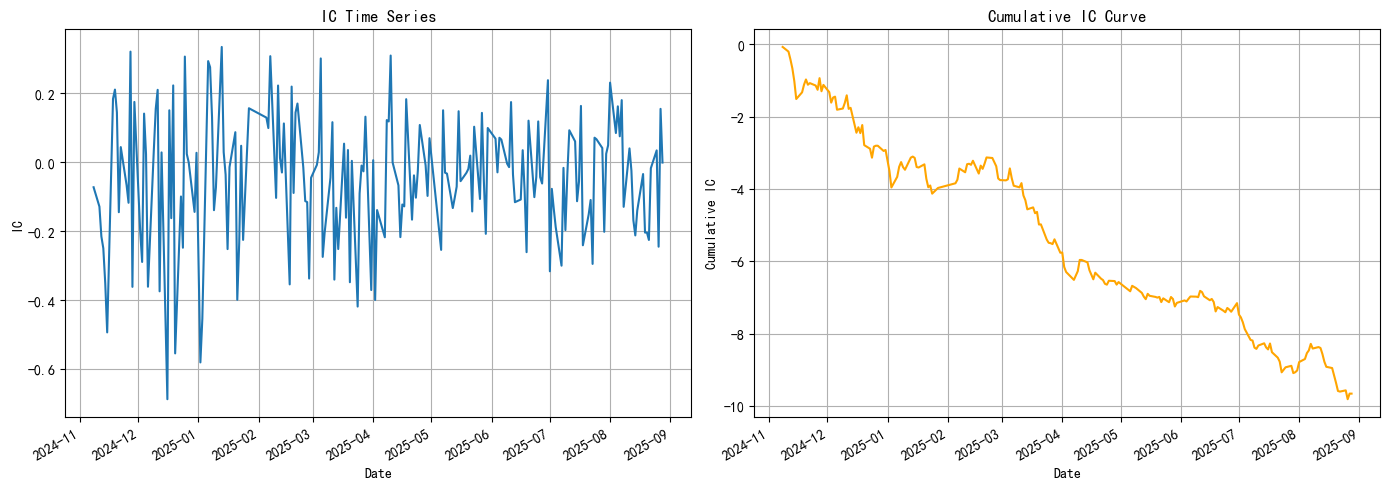

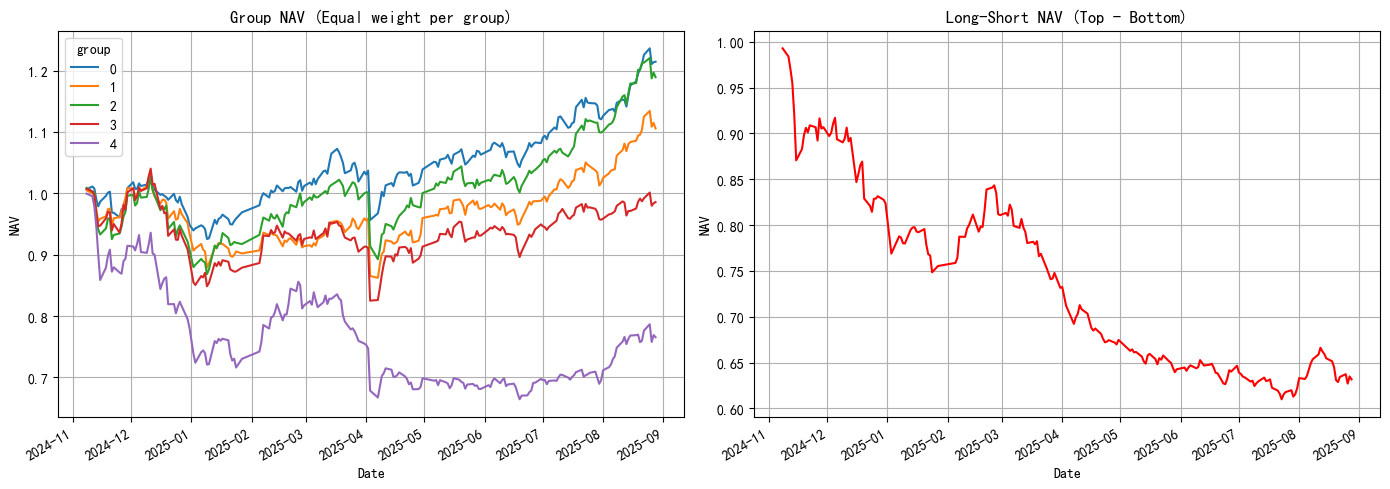

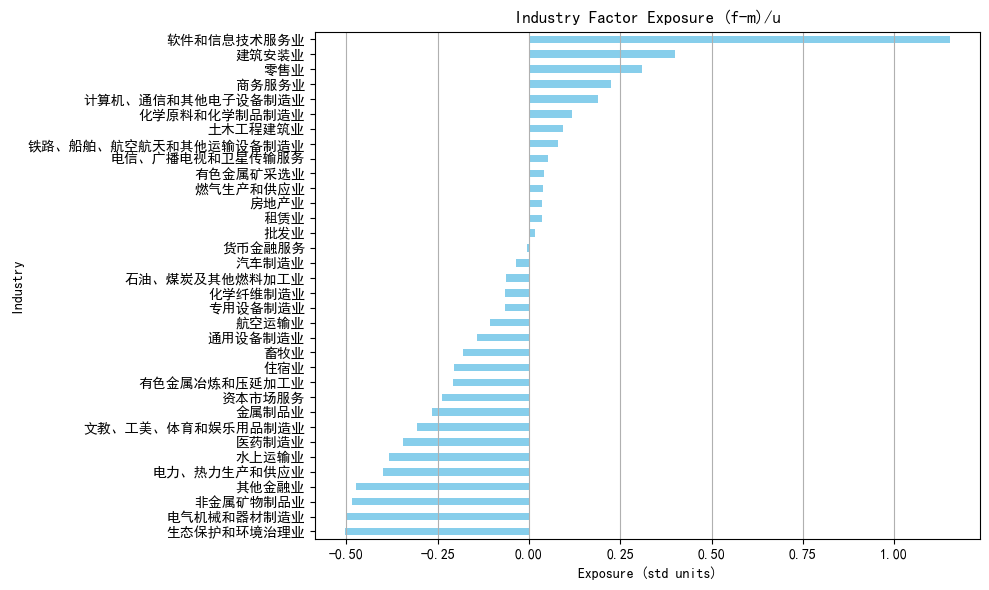

In [175]:
# 假设你已有 merged_df（包含 date, order_book_id, factor_value, close）
sft = SingleFactorTool(factor_long_df=merged_df[['date','order_book_id','factor_value']],
                       price_df=merged_df[['date','order_book_id','close','industry_name']])
sft.generate_future_return(forward_days=1)

ic_df, ic_stats = sft.calculate_ic_cross_sectional()
sft.plot_ic(ic_df)

res = sft.layered_effect_analysis(n_groups=5)
exposure = sft.industry_exposure()
sft.plot_industry_exposure(exposure)

hit = sft.factor_hit_rates()

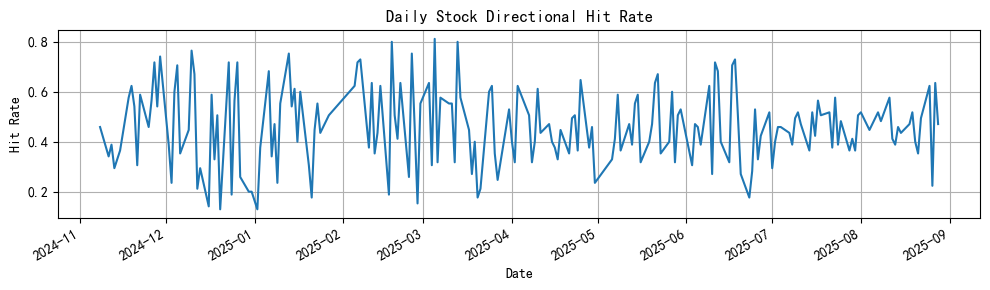

In [174]:
plt.figure(figsize=(10,3))
hit['daily_stock_hit_series'].plot(title='Daily Stock Directional Hit Rate', legend=False)
plt.ylabel('Hit Rate'); plt.xlabel('Date'); plt.grid(True); plt.tight_layout(); plt.show()

In [160]:
hit['daily_stock_hit_series'].head()

date
2024-11-08    0.458824
2024-11-11    0.341176
2024-11-12    0.388235
2024-11-13    0.294118
2024-11-14    0.329412
Name: hit, dtype: float64

In [173]:
sft.factor_hit_rates()

{'IC_positive_ratio': 0.3939393939393939,
 'stock_directional_hit_rate': 0.45828877005347596,
 'long_short_win_rate': 0.4595959595959596,
 'daily_stock_hit_series': date
 2024-11-08    0.458824
 2024-11-11    0.341176
 2024-11-12    0.388235
 2024-11-13    0.294118
 2024-11-14    0.329412
                 ...   
 2025-08-22    0.494118
 2025-08-25    0.623529
 2025-08-26    0.223529
 2025-08-27    0.635294
 2025-08-28    0.470588
 Name: hit, Length: 198, dtype: float64}